In [1]:
#import required libraries
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/rossmann-store-sales/final_RossmannSales.csv", index_col=0)

In [3]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season,Holiday per week,Avg CustomersPerMonth,Avg CustomersPerWeek,PromoCountperWeek,CompetitionOpenSince,CompetitionDistanceLOG,State,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1,0,0,1270.0,9,2008,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2008-09-01,7.146772,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
1,56,2,1,6620.0,3,2012,1,5,2015-07-31,10022,619,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2012-03-01,8.797851,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
2,69,0,1,1130.0,1,2013,1,5,2015-07-31,11204,1371,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2013-01-01,7.029973,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
3,77,2,1,1090.0,8,2009,1,5,2015-07-31,10335,780,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2009-08-01,6.993933,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
4,111,2,1,7890.0,1,2013,1,5,2015-07-31,8897,698,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2013-01-01,8.973351,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13


In [4]:
df=df.drop(columns=['Date','CompetitionOpenSince'])

In [6]:
#encoding State variables
p=0
for j in df["State"].unique():
   df["State"]=np.where(df["State"]==j,p,df["State"])
   p=p+1
df["State"]=df["State"].astype(int)

In [7]:
#Splitting of data
features=df.drop(columns=["Sales"])
features=preprocessing.scale(features)
target=df["Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(features,target)

## Using Linear Regression to predict 'Sales'

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred=linear_reg_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,4091.566946,3586
1,-308.211853,0
2,482.782180,0
3,7714.202022,7714
4,7519.548334,5491


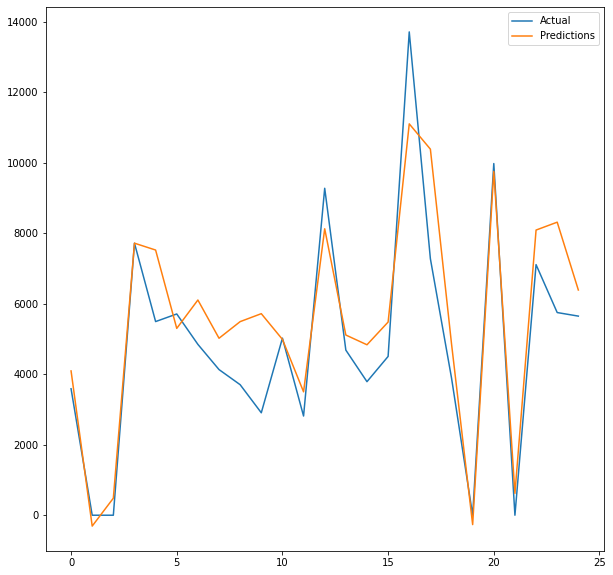

In [11]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [12]:
linear_reg_model.score(X_test,Y_test)

0.8760264487845306

## Using Lasso Regression to predict 'Sales'

In [13]:
from sklearn.linear_model import Lasso
Lasso_reg_model = Lasso(alpha=0.01)
Lasso_reg_model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94882129626.38513, tolerance: 1054506470.1060488
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
y_pred=Lasso_reg_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,4091.496185,3586
1,-308.542129,0
2,482.580099,0
3,7713.525995,7714
4,7519.529639,5491


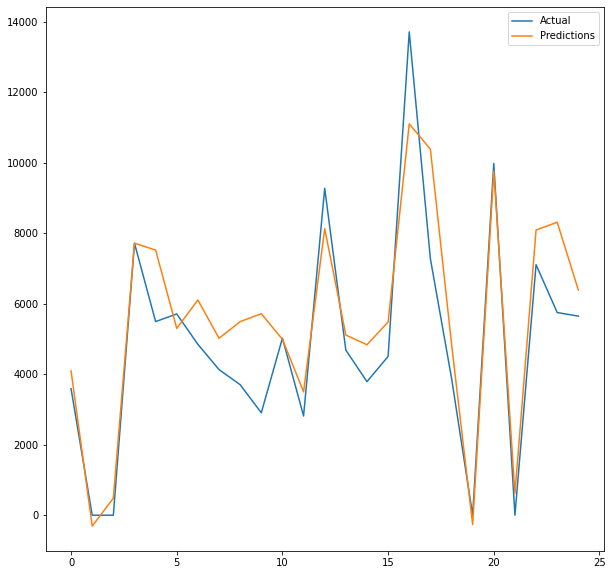

In [15]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [16]:
Lasso_reg_model.score(X_test,Y_test)

0.8760266155928175

## Using Gradient Boosted Decision Trees to predict 'Sales'

In [17]:
import lightgbm as lgb
base_lgb_model = lgb.LGBMRegressor(n_leaves=50,
                               n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

base_lgb_model.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=700, n_jobs=-1, n_leaves=50, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.1, reg_lambda=1,
              silent=True, subsample=1, subsample_for_bin=200000,
              subsample_freq=0)

In [18]:
y_pred=base_lgb_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,3293.585951,3586
1,24.129638,0
2,-89.830695,0
3,7477.151188,7714
4,5946.615739,5491


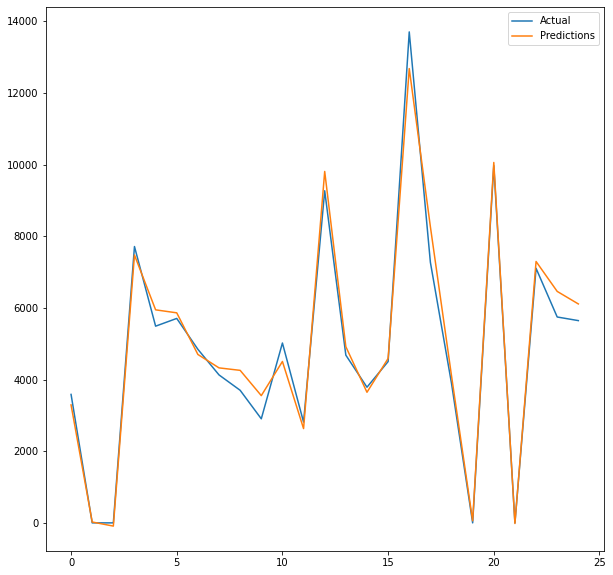

In [19]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [20]:
base_lgb_model.score(X_test,Y_test)

0.9900907365048578